### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

### Ⅰ. 데이터 탐색

In [1]:
import pandas as pd

cs_df = pd.read_csv("./datasets/customer_shopping_data.csv")
display(cs_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### ✏️ 기획 
1. 전체 쇼핑몰 종합 순위 분석
2. 쇼핑몰 별 총 판매량 및 총 매출액
3. 쇼핑몰 별 주요 고객 분석(연령층, 성별)
4. 쇼핑몰 별 품목 분석(인기 품목, 판매량)

#### 📊 데이터 정보 확인

In [2]:
# cs_df 의 정보 가져오기
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [3]:
# 쇼핑몰 확인
cs_df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [4]:
# 성별 확인
cs_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [5]:
# 상품 카테고리 확인
cs_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [6]:
# 결제 방식 확인
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

#### 📊 결측치 검사

In [7]:
# cs_df의 결측치 개수를 가져오기
cs_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

#### 📊 중복행 검사

In [8]:
# cs_df의 중복행 개수를 가져오기
cs_df.duplicated().sum()

0

#### 💡 분석
- 쇼핑몰 별 거래 데이터 프레임의 전체 정보
- 10개 컬럼이 존재함.
- 99457개 데이터 존재함.
- 결측치가 존재하지 않음.
- 중복 데이터가 존재하지 않음.

#### ❓ 가설
- 환불된 주문 데이터가 있을까?

#### 📊 숫자형 데이터 개수, 평균, 표준편차, 최소값, 사분위 분포도, 최대값 확인

In [9]:
cs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


#### 💡 분석
- 고객의 평균 연령은 약 43살으로 나타남.
- 최고 연령은 69살이며, 최소 연령은 18으로 나타남.
- 고객 당 평균 약 1.4개의 제품을 구매한 것으로 나타남.
- 상품 단가는 평균 약 689.427로 나타남.
- 상품의 최고 단가는 5250이며, 최소 단가는 5.23으로 나타남.

#### 📌 시사점
- 상품 최소 단가가 음수로 나오지 않았기 때문에 환불된 데이터가 없는 것으로 판단함.
- 나이, 개수는 이상치 제거가 적절하지 않다고 판단되므로, 별도의 이상치 제거는 실시하지 않음.

#### ❓ 가설
- 주문번호 중 I로 시작하지 않는 주문번호가 있을까?
- 고객번호 중 C로 시작하지 않는 고객번호가 있을까?

#### 📊 주문번호 및 고객번호 이상치 확인

In [10]:
# 주문번호 중 앞글자가 I로 시작하지 않는 주문번호 확인
cs_df[~cs_df['invoice_no'].str.startswith('I')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [11]:
# 고객번호 중 앞글자가 C로 시작하지 않는 고객번호 확인
cs_df[~cs_df['customer_id'].str.startswith('C')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


#### 💡 분석
- 모든 주문번호는 동일하게 I로 시작함.
- 모든 고객번호는 동일하게 C로 시작함.

#### 📌 시사점
- 쇼핑몰에 따라 주문번호 및 고객번호의 양식이 달라지지 않으며, 모두 동일한 양식을 띄고 있음.

#### ❓ 가설
- 쇼핑몰에 따라 주문번호 및 고객번호가 달라지지 않는다면, 쇼핑몰은 다르지만 주문번호 및 고객번호가 중복되는 경우가 있을까?

In [12]:
# 주문번호 데이터 개수 확인
cs_df['invoice_no'].value_counts()

invoice_no
I138884    1
I291671    1
I175779    1
I226143    1
I683818    1
          ..
I319287    1
I173400    1
I828064    1
I194850    1
I232867    1
Name: count, Length: 99457, dtype: int64

In [13]:
# 고객번호 데이터 개수 확인
cs_df['customer_id'].value_counts()

customer_id
C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: count, Length: 99457, dtype: int64

#### 💡 분석
- 주문번호와 고객번호는 각 99457개가 존재하며, 중복되는 값이 없음.

### Ⅱ. 데이터 전처리

In [14]:
# 전처리 전 원본 데이터 보존을 위해 복사하여 새로운 데이터 프레임에 담아주기
cs_copy_df = cs_df.copy()
cs_copy_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### 📊 invoice_date 현재 기준으로 변경

In [15]:
# invoice_data 데이터 변환
# 15/10/2022 형식에서 dayfirst=True를 통해 날짜가 먼저 오는 형식을 사용한다는 것을 나타낸다.
cs_copy_df['invoice_date'] = pd.to_datetime(cs_copy_df['invoice_date'], dayfirst=True)

# 날짜 내림차순 정렬
cs_copy_df.sort_values(by=['invoice_date'], ascending=False).reset_index(drop=True)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I289611,C222906,Female,45,Clothing,3,900.24,Debit Card,2023-03-08,Cevahir AVM
1,I271683,C180068,Male,55,Shoes,1,600.17,Credit Card,2023-03-08,Emaar Square Mall
2,I312534,C235553,Female,68,Food & Beverage,5,26.15,Credit Card,2023-03-08,Emaar Square Mall
3,I345170,C108141,Female,20,Food & Beverage,1,5.23,Credit Card,2023-03-08,Kanyon
4,I254758,C178144,Female,51,Cosmetics,5,203.30,Cash,2023-03-08,Metropol AVM
...,...,...,...,...,...,...,...,...,...,...
99452,I224830,C254068,Female,30,Food & Beverage,3,15.69,Cash,2021-01-01,Metrocity
99453,I211131,C280473,Male,51,Cosmetics,2,81.32,Cash,2021-01-01,Istinye Park
99454,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
99455,I474975,C193810,Female,20,Clothing,2,600.16,Credit Card,2021-01-01,Metropol AVM


In [16]:
# 데이터 중 가장 최신 날짜 가져오기
recently_date = pd.to_datetime(cs_copy_df['invoice_date'].max())
print(recently_date)

# 현재 기준으로 변경하기
cs_copy_df['invoice_date'] = (recently_date - pd.to_datetime(cs_copy_df['invoice_date'])).dt.days

# 날짜 오름차순 정렬(최신순)
cs_copy_df.sort_values(by=['invoice_date'], ascending = True).reset_index(drop=True)

2023-03-08 00:00:00


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I139558,C196970,Male,41,Food & Beverage,4,20.92,Credit Card,0,Metrocity
1,I323613,C276677,Male,41,Clothing,5,1500.40,Credit Card,0,Metropol AVM
2,I498568,C788712,Female,65,Shoes,4,2400.68,Cash,0,Kanyon
3,I122847,C290329,Female,53,Food & Beverage,4,20.92,Credit Card,0,Kanyon
4,I139860,C224033,Male,28,Clothing,5,1500.40,Debit Card,0,Emaar Square Mall
...,...,...,...,...,...,...,...,...,...,...
99452,I371949,C260427,Male,50,Toys,2,71.68,Credit Card,796,Metrocity
99453,I278066,C316581,Female,48,Food & Beverage,2,10.46,Cash,796,Kanyon
99454,I115941,C105769,Male,34,Clothing,1,300.08,Cash,796,Istinye Park
99455,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,796,Kanyon


#### 📊 주문 별 총 결제 금액

In [17]:
# 주문 수량과 상품 단가를 곱하여 주문 별 총 결제 금액 구하기
cs_copy_df['total_price'] = cs_copy_df['quantity'] * cs_copy_df['price']
cs_copy_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,215,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,451,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,484,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,661,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,500,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,168,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,532,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,710,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,722,Istinye Park,16800.00


#### 📊 Recency (쇼핑몰 별)

In [18]:
# 쇼핑몰 별로 구매 일자에 대한 평균을 구하고 새로운 데이터 프레임에 담아주기
rfm_df = cs_copy_df.groupby('shopping_mall')['invoice_date'].mean().reset_index(name='recently_mean_date')
rfm_df

,shopping_mall,recently_mean_date
0,Cevahir AVM,405.023843
1,Emaar Square Mall,395.769071
2,Forum Istanbul,398.580554
3,Istinye Park,395.735610
4,Kanyon,394.678404
5,Mall of Istanbul,395.740912
6,Metrocity,397.105989
7,Metropol AVM,398.891546
8,Viaport Outlet,401.312983
9,Zorlu Center,394.638424


#### 📊 Frequency (쇼핑몰 별)

In [19]:
rfm_df['invoice_count'] = cs_copy_df.groupby('shopping_mall')['invoice_no'].count().reset_index()['invoice_no']
rfm_df

,shopping_mall,recently_mean_date,invoice_count
0,Cevahir AVM,405.023843,4991
1,Emaar Square Mall,395.769071,4811
2,Forum Istanbul,398.580554,4947
3,Istinye Park,395.735610,9781
4,Kanyon,394.678404,19823
5,Mall of Istanbul,395.740912,19943
6,Metrocity,397.105989,15011
7,Metropol AVM,398.891546,10161
8,Viaport Outlet,401.312983,4914
9,Zorlu Center,394.638424,5075


#### 📊 Monetary (쇼핑몰 별)

In [20]:
rfm_df['all_total_price'] = cs_copy_df.groupby('shopping_mall').sum('total_price').reset_index()['total_price']
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price
0,Cevahir AVM,405.023843,4991,12645138.20
1,Emaar Square Mall,395.769071,4811,12406100.29
2,Forum Istanbul,398.580554,4947,12303921.24
3,Istinye Park,395.735610,9781,24618827.68
4,Kanyon,394.678404,19823,50554231.10
5,Mall of Istanbul,395.740912,19943,50872481.68
6,Metrocity,397.105989,15011,37302787.33
7,Metropol AVM,398.891546,10161,25379913.19
8,Viaport Outlet,401.312983,4914,12521339.72
9,Zorlu Center,394.638424,5075,12901053.82


In [21]:
# 중복값 검사
rfm_df.duplicated().sum()

0

### Ⅲ. 정규화

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임 복사
rfm = rfm_df.copy()
# shopping_mall 피처 삭제
rfm = rfm.drop(labels=['shopping_mall'], axis=1)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

# 정규화된 데이터를 데이터 프레임으로 변환, 피처는 rfm 데이터 프레임과 동일하게 설정
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)

# recently_mean_date는 현재 낮을 수록 최신에 가깝고, 최신 점수가 더 높아야 하기 때문에 1을 빼서 점수를 높여준다.
rfm['recently_mean_date'] = 1 - rfm['recently_mean_date']
rfm

,recently_mean_date,invoice_count,all_total_price
0,0.000000,0.011895,0.008847
1,0.891131,0.000000,0.002649
2,0.620417,0.008988,0.000000
3,0.894353,0.328443,0.319299
4,0.996150,0.992070,0.991748
5,0.893843,1.000000,1.000000
6,0.762401,0.674068,0.648167
7,0.590472,0.353555,0.339032
8,0.357314,0.006807,0.005637
9,1.000000,0.017446,0.015482


#### 📊 쇼핑몰 등급(순위)

In [23]:
# rfm을 더하여 TotalScore 구하기
rfm_df['TotalScore'] = rfm[['recently_mean_date', 'invoice_count', 'all_total_price']].sum(axis=1)
# 순위별로 오름차순 정렬
rfm_df = rfm_df.sort_values(by=['TotalScore'], ascending = False).reset_index(drop=True)
# 정렬 순서대로 순위 넣기
rfm_df['rank'] = rfm_df['TotalScore'].rank(ascending = False)

#현재 순위가 실수로 나오기 때문에, 정수로 타입 변환
rfm_df = rfm_df.astype({'rank': 'int8'})
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank
0,Kanyon,394.678404,19823,50554231.10,2.979969,1
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2
2,Metrocity,397.105989,15011,37302787.33,2.084636,3
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10


#### 📊 쇼핑몰 별 성별

In [24]:
# 피벗 테이블을 사용하여 쇼핑몰 별 각 성별의 수 구하기
# 행: shopping_mall, 열: gender, 집계방법: size(데이터 개수 세기)
customer_gender = cs_copy_df.pivot_table(index='shopping_mall', columns='gender', aggfunc='size').reset_index()

# 데이터 프레임 합치기
rfm_df = pd.merge(rfm_df, customer_gender, on='shopping_mall')
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051


#### 📊 쇼핑몰 별 품목

In [25]:
category_df = rfm_df.copy()
# 쇼핑몰 별 품목 확인
category_df['category'] = cs_copy_df.groupby('shopping_mall')['category'].apply(lambda x: ', '.join(x)).reset_index()['category']

# category를 ','를 기준으로 분할하여 리스트로 변환하고 값을 세주기
def count_category(group):
    return pd.Series(group['category'].str.split(', ').explode().value_counts())

# shopping_mall로 그룹화하고 각 그룹에 대해 category 개수를 세는 함수를 적용
category_counts = category_df.groupby('shopping_mall').apply(count_category).reset_index()
# 피처명 변경
category_counts.columns = ['shopping_mall', 'category', 'category_Count']

display(category_counts)

,shopping_mall,category,category_Count
0,Cevahir AVM,Clothing,1761
1,Cevahir AVM,Cosmetics,764
2,Cevahir AVM,Food & Beverage,750
3,Cevahir AVM,Shoes,519
4,Cevahir AVM,Toys,513
...,...,...,...
75,Zorlu Center,Shoes,2023
76,Zorlu Center,Toys,2000
77,Zorlu Center,Books,1025
78,Zorlu Center,Technology,1017


In [26]:
# 전체 품목 별 판매량
all_df = category_counts.groupby('category')['category_Count'].sum().reset_index()
all_df = all_df.sort_values(by='category_Count', ascending=False)

# Kanyon 품목 별 판매량
Kanyon_df = category_counts[category_counts['shopping_mall'] == 'Kanyon'].reset_index(drop=True)
Kanyon_df = Kanyon_df.sort_values(by='category_Count', ascending=False)

# Mall of Istanbul 품목 별 판매량
Istanbul_df = category_counts[category_counts['shopping_mall'] == 'Mall of Istanbul	'].reset_index(drop=True)
Istanbul_df = Istanbul_df.sort_values(by='category_Count', ascending=False)

# Metrocity 품목 별 판매량
Metrocity_df = category_counts[category_counts['shopping_mall'] == 'Metrocity'].reset_index(drop=True)
Metrocity_df = Metrocity_df.sort_values(by='category_Count', ascending=False)

# Istinye Park 품목 별 판매량
Istinye_df = category_counts[category_counts['shopping_mall'] == 'Istinye Park'].reset_index(drop=True)
Istinye_df = Istinye_df.sort_values(by='category_Count', ascending=False)

# Metropol AVM 품목 별 판매량
Metropol_df = category_counts[category_counts['shopping_mall'] == 'Metropol AVM'].reset_index(drop=True)
Metropol_df = Metropol_df.sort_values(by='category_Count', ascending=False)

# Zorlu Center 품목 별 판매량
Zorlu_df = category_counts[category_counts['shopping_mall'] == 'Zorlu Center'].reset_index(drop=True)
Zorlu_df = Zorlu_df.sort_values(by='category_Count', ascending=False)

# Emaar Square Mall 품목 별 판매량
Emaar_df = category_counts[category_counts['shopping_mall'] == 'Emaar Square Mall'].reset_index(drop=True)
Emaar_df = Emaar_df.sort_values(by='category_Count', ascending=False)

# Forum Istanbul 품목 별 판매량
Forum_df = category_counts[category_counts['shopping_mall'] == 'Forum Istanbul'].reset_index(drop=True)
Forum_df = Forum_df.sort_values(by='category_Count', ascending=False)

# Viaport Outlet 품목 별 판매량
Viaport_df = category_counts[category_counts['shopping_mall'] == 'Viaport Outlet'].reset_index(drop=True)
Viaport_df = Viaport_df.sort_values(by='category_Count', ascending=False)

# Cevahir AVM 품목 별 판매량
Cevahir_df = category_counts[category_counts['shopping_mall'] == 'Cevahir AVM'].reset_index(drop=True)
Cevahir_df = Cevahir_df.sort_values(by='category_Count', ascending=False)

### Ⅳ. 분석

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

display(cs_copy_df)
display(rfm_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,215,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,451,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,484,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,661,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,500,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,168,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,532,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,710,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,722,Istinye Park,16800.00


,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051


#### 📊 전체 쇼핑몰 종합 순위

In [28]:
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051


#### 💡 분석
- 전제 쇼핑몰 중 Kanyon(카뇽)이 약 2.98점으로 1위를 기록했으며, Cevahir(체바히르)가 약 0.02로 9위를 기록함.
- Kanyon 약 2.98점, Istanbul 약 2.89점, Metrocity 약 2.08점, Istinye Park 약 1.54점, Metropol AVM 약 1.28점, Zorlu Center	약 1.03점, Emaar Square Mall 약 0.89점, Forum Istanbul 약 0.63점, Viaport Outlet 약 0.36점, Cevahir AVM 약 0.02점 순으로 나타남,

#### 📊 쇼핑몰 별 총 판매량 및 총 매출액

Text(0.5, 1.0, 'bronze')

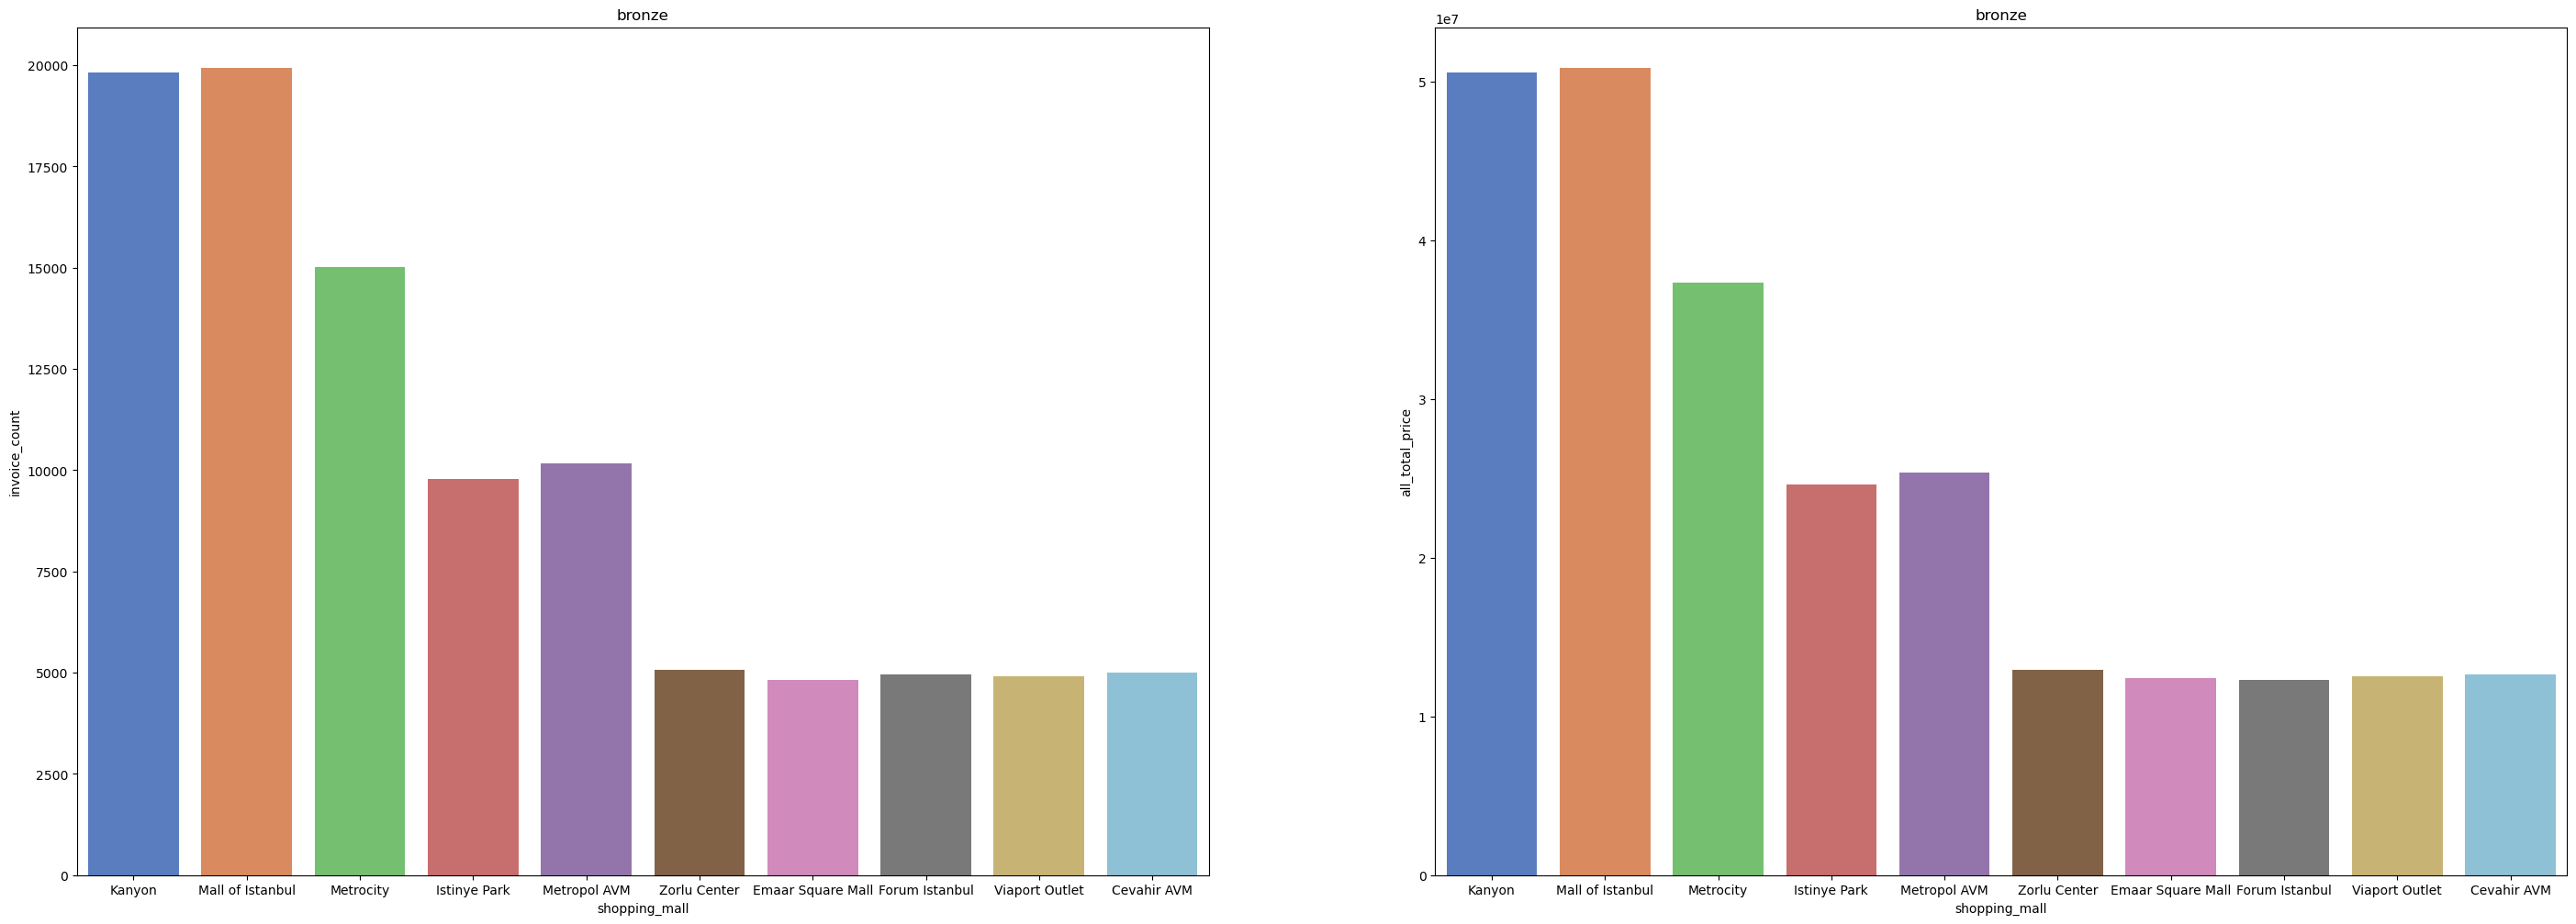

In [29]:
# 쇼핑몰 별 판매량 및 매출액 도식화
fig, axes = plt.subplots(1,2, figsize=(35,12))

sns.barplot(ax=axes[0], x='shopping_mall', y='invoice_count', data=rfm_df, palette='muted')
axes[0].set_title('bronze')
sns.barplot(ax=axes[1], x='shopping_mall', y='all_total_price', data=rfm_df, palette='muted')
axes[1].set_title('bronze')

#### 💡 분석
- 가장 높은 판매량을 기록한 쇼핑몰은 Istanbul(이스탄불)이 19943개를 판매하였으며, 가장 낮은 판매량을 기록한 쇼핑몰은 Emaar Square Mall(에마르 스퀘어 몰)이 4811개를 판매하였다.
- Istanbul 19943개, Kanyon 19823개, Metrocity 15011개, Metropol AVM	10161개, Istinye Park 9781개, Zorlu Center 5075개, Cevahir AVM 4991개, Forum Istanbul 4947개, Viaport Outlet 4914개, Emaar Square Mall 4811개 순으로 나타남.

#### 📌 시사점
- Istanbul(이스탄불)이 Kanyon(카뇽) 보다 판매량과 매출액이 더 우세하나 고객의 활동성에서 열세함. Istanbul(이스탄불)은 이탈 고객 비중이 Kanyon(카뇽) 보다 높은 것으로 판단되며, 고객 유지 및 복귀 관련 마케팅이 필요함.
- 하위 5개 쇼핑몰이 상위 5개 쇼핑몰에 비해 고객 활동성, 상품 판매량, 매출액이 현저히 열세함. 하위 5개 쇼핑몰의 현재 마케팅 전략은 제대로 추진되고 있지 않다고 판단되며, 고객 유지 및 상품 판매를 증대하기 위한 방안을 마련해야 함.

#### 📊 쇼핑몰 별 주요 고객 분석(성별)

In [40]:
cs_copy_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

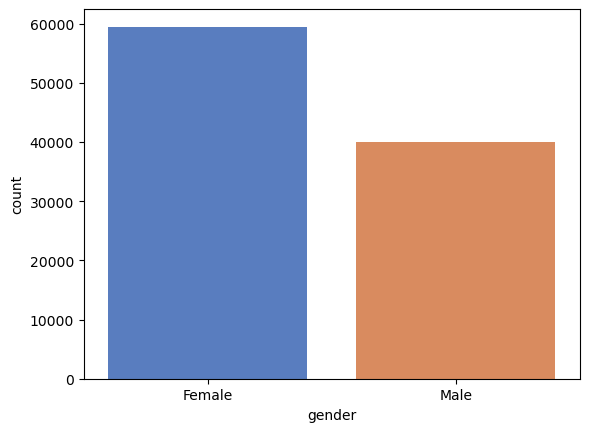

In [39]:
# 전체 성별 도식화
sns.countplot(x='gender', data=cs_copy_df, palette='muted')

#### 📊 쇼핑몰 별 주요 고객 분석(연령대)

#### 📊 쇼핑몰 별 품목 분석

In [37]:
display(all_df)
display(Kanyon_df)
display(Istanbul_df)
display(Metrocity_df)
display(Istinye_df)
display(Metropol_df)
display(Zorlu_df)
display(Emaar_df)
display(Forum_df)
display(Viaport_df)
display(Cevahir_df)

,category,category_Count
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


,shopping_mall,category,category_Count
0,Kanyon,Clothing,1729
1,Kanyon,Food & Beverage,772
2,Kanyon,Cosmetics,732
3,Kanyon,Toys,514
4,Kanyon,Shoes,490
5,Kanyon,Books,258
6,Kanyon,Technology,256
7,Kanyon,Souvenir,240


,shopping_mall,category,category_Count


,shopping_mall,category,category_Count
0,Metrocity,Clothing,1729
1,Metrocity,Cosmetics,770
2,Metrocity,Food & Beverage,712
3,Metrocity,Toys,531
4,Metrocity,Shoes,458
5,Metrocity,Souvenir,261
6,Metrocity,Books,252
7,Metrocity,Technology,234


,shopping_mall,category,category_Count
0,Istinye Park,Clothing,3353
1,Istinye Park,Food & Beverage,1490
2,Istinye Park,Cosmetics,1458
3,Istinye Park,Toys,1015
4,Istinye Park,Shoes,1001
5,Istinye Park,Souvenir,515
6,Istinye Park,Technology,487
7,Istinye Park,Books,462


,shopping_mall,category,category_Count
0,Metropol AVM,Clothing,6840
1,Metropol AVM,Cosmetics,3023
2,Metropol AVM,Food & Beverage,2909
3,Metropol AVM,Shoes,2017
4,Metropol AVM,Toys,1987
5,Metropol AVM,Souvenir,1037
6,Metropol AVM,Books,1013
7,Metropol AVM,Technology,997


,shopping_mall,category,category_Count
0,Zorlu Center,Clothing,6923
1,Zorlu Center,Cosmetics,3050
2,Zorlu Center,Food & Beverage,2957
3,Zorlu Center,Shoes,2023
4,Zorlu Center,Toys,2000
5,Zorlu Center,Books,1025
6,Zorlu Center,Technology,1017
7,Zorlu Center,Souvenir,948


,shopping_mall,category,category_Count
0,Emaar Square Mall,Clothing,5268
1,Emaar Square Mall,Cosmetics,2265
2,Emaar Square Mall,Food & Beverage,2244
3,Emaar Square Mall,Toys,1515
4,Emaar Square Mall,Shoes,1457
5,Emaar Square Mall,Technology,772
6,Emaar Square Mall,Books,752
7,Emaar Square Mall,Souvenir,738


,shopping_mall,category,category_Count
0,Forum Istanbul,Clothing,3525
1,Forum Istanbul,Cosmetics,1541
2,Forum Istanbul,Food & Beverage,1517
3,Forum Istanbul,Shoes,1074
4,Forum Istanbul,Toys,1033
5,Forum Istanbul,Souvenir,531
6,Forum Istanbul,Books,476
7,Forum Istanbul,Technology,464


,shopping_mall,category,category_Count
0,Viaport Outlet,Clothing,1708
1,Viaport Outlet,Cosmetics,734
2,Viaport Outlet,Food & Beverage,733
3,Viaport Outlet,Toys,515
4,Viaport Outlet,Shoes,497
5,Viaport Outlet,Technology,256
6,Viaport Outlet,Books,246
7,Viaport Outlet,Souvenir,225


,shopping_mall,category,category_Count
0,Cevahir AVM,Clothing,1761
1,Cevahir AVM,Cosmetics,764
2,Cevahir AVM,Food & Beverage,750
3,Cevahir AVM,Shoes,519
4,Cevahir AVM,Toys,513
5,Cevahir AVM,Books,261
6,Cevahir AVM,Souvenir,257
7,Cevahir AVM,Technology,250
